In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/DS5230_Project/

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
import pickle

In [3]:
ndf = pd.read_csv('model3.csv')
ndf.head()

,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,Other Races,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,1,7.033408,4.034134,12.513945,32.986141,0.700316,0.029173,0.067944,0.175212,0.027454,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,15,6.990224,3.826041,13.093500,34.900000,0.719667,0.063833,0.113500,0.080333,0.022833,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,7,6.967226,3.962442,13.076501,32.866667,0.333833,0.026833,0.560500,0.041167,0.038167,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,2,6.929485,3.913553,13.237799,30.097267,0.224368,0.389967,0.263748,0.079663,0.042449,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,3,6.984170,3.949746,13.275074,37.066667,0.064500,0.723833,0.157167,0.019500,0.034833,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210


## Clustering Full Dataset

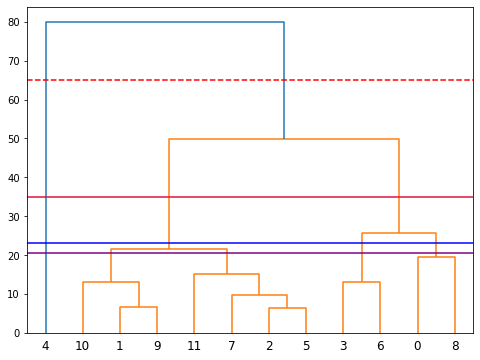

In [297]:
clusters = hierarchy.linkage(ndf, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(65, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(35, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(23, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(20.5, color='purple');

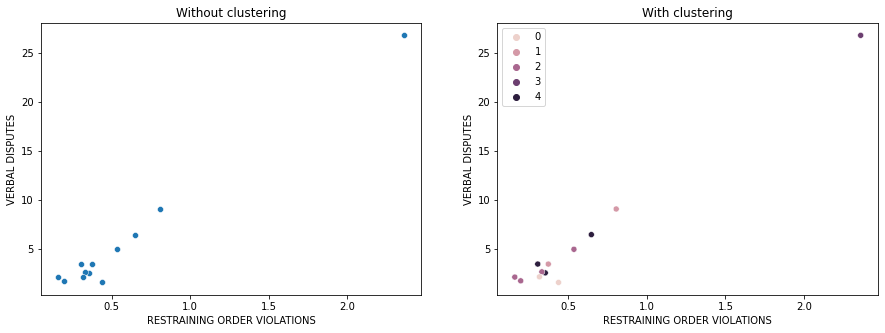

In [304]:
clustering_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
clustering_model.fit(ndf)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

## Variable Comparisons

In [5]:
df = pd.read_csv('model_data2.csv')
print(df.shape) 

(12, 69)


In [61]:
df.isnull().sum()

DISTRICT           0
MONTH              0
DAY_OF_WEEK        0
HOUR               0
Median Age         0
                  ..
TOWED              0
VANDALISM          0
VERBAL DISPUTES    0
VIOLATIONS         0
WARRANT ARRESTS    0
Length: 69, dtype: int64

In [62]:
df

,DISTRICT,MONTH,DAY_OF_WEEK,HOUR,Median Age,White Alone,Black / African American,Hispanic,Asian Alone,Other Races,...,PROSTITUTION,RESTRAINING ORDER VIOLATIONS,ROBBERY,SEARCH WARRANTS,SERVICE,TOWED,VANDALISM,VERBAL DISPUTES,VIOLATIONS,WARRANT ARRESTS
0,A1,7.033408,4.034134,12.513945,32.986141,0.700316,0.029173,0.067944,0.175212,0.027454,...,0.207862,0.438652,3.255942,0.261958,0.079964,7.239948,7.067827,1.594640,1.818416,6.784553
1,A15,6.990224,3.826041,13.093500,34.900000,0.719667,0.063833,0.113500,0.080333,0.022833,...,0.000000,0.354359,0.944578,0.253053,0.166541,4.608553,5.037885,2.570483,1.191922,1.192759
2,A7,6.967226,3.962442,13.076501,32.866667,0.333833,0.026833,0.560500,0.041167,0.038167,...,0.003705,0.332539,1.238325,0.122911,0.137881,3.329743,4.537581,2.676015,1.435600,1.296317
3,B2,6.929485,3.913553,13.237799,30.097267,0.224368,0.389967,0.263748,0.079663,0.042449,...,0.100164,0.805532,2.378504,0.702133,0.145011,3.417453,8.010383,9.089829,4.043674,3.692102
4,B3,6.984170,3.949746,13.275074,37.066667,0.064500,0.723833,0.157167,0.019500,0.034833,...,0.019438,2.360219,4.850677,1.769451,0.396645,7.647783,19.247567,26.807097,8.484071,4.878210
5,C11,6.954368,3.935199,13.067816,33.133333,0.219833,0.430833,0.185167,0.101000,0.063000,...,0.089078,0.536698,1.259134,0.223159,0.098609,2.583718,4.759928,4.975176,1.687260,1.881792
6,C6,6.992721,3.969458,12.768413,32.153269,0.773607,0.052529,0.099930,0.052459,0.021453,...,0.078554,0.373794,1.591727,0.248840,0.139623,8.755471,7.343611,3.470135,1.363744,3.342219
7,D14,7.051409,3.976169,12.820425,28.934509,0.620495,0.046337,0.117377,0.174762,0.040817,...,0.109310,0.197901,0.561975,0.194145,0.093932,5.144274,3.598129,1.760091,0.917704,0.656967
8,D4,7.006984,3.955507,12.983868,30.529933,0.607478,0.073335,0.115707,0.167306,0.036406,...,0.046381,0.317460,1.705076,0.094601,0.079262,5.649420,5.130293,2.166338,1.369631,2.904208
9,E13,6.970813,3.879755,13.350468,34.100000,0.547167,0.119000,0.235500,0.058333,0.038500,...,0.004254,0.306405,1.441597,0.318479,0.119816,5.239595,4.924821,3.472188,2.498392,2.159070


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 69 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DISTRICT                           12 non-null     object 
 1   MONTH                              12 non-null     float64
 2   DAY_OF_WEEK                        12 non-null     float64
 3   HOUR                               12 non-null     float64
 4   Median Age                         12 non-null     float64
 5   White Alone                        12 non-null     float64
 6   Black / African American           12 non-null     float64
 7   Hispanic                           12 non-null     float64
 8   Asian Alone                        12 non-null     float64
 9   Other Races                        12 non-null     float64
 10  Less than High School              12 non-null     float64
 11  High School Graduate               12 non-null     float64
 

In [67]:
df1 = [['PROSTITUTION', 'RESTRAINING ORDER VIOLATIONS']]
df1

,PROSTITUTION,RESTRAINING ORDER VIOLATIONS
0,0.207862,0.438652
1,0.000000,0.354359
2,0.003705,0.332539
3,0.100164,0.805532
4,0.019438,2.360219
5,0.089078,0.536698
6,0.078554,0.373794
7,0.109310,0.197901
8,0.046381,0.317460
9,0.004254,0.306405


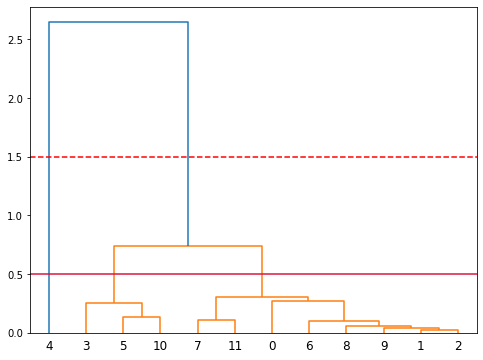

In [81]:
clusters = hierarchy.linkage(df1, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(1.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(0.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
# plt.axhline(0.2, color='blue');

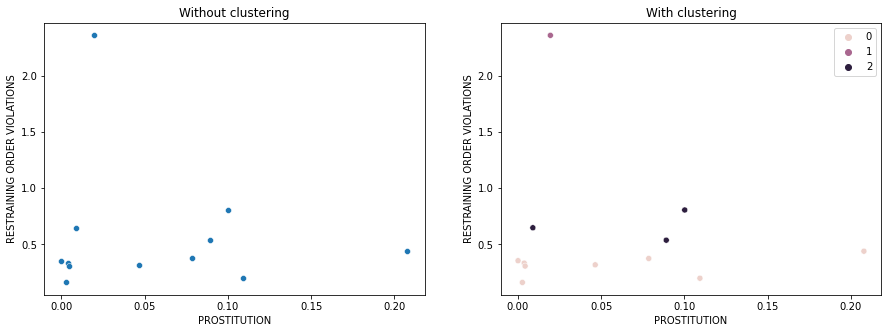

In [76]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df1)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='RESTRAINING ORDER VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='RESTRAINING ORDER VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

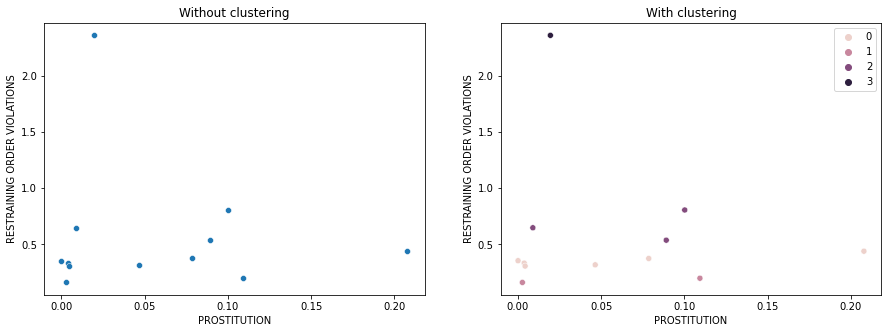

In [77]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df1)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='RESTRAINING ORDER VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='RESTRAINING ORDER VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

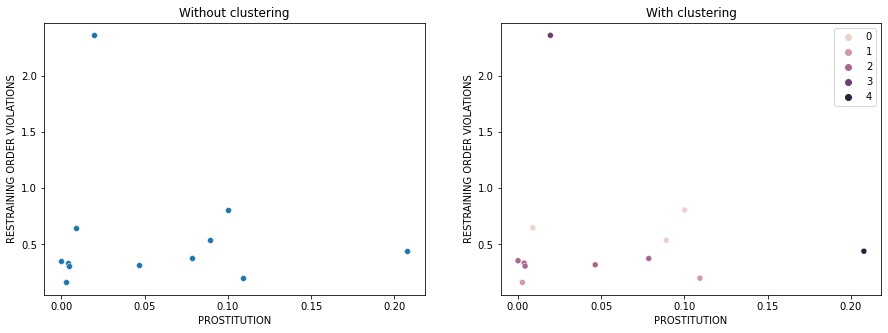

In [78]:
clustering_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
clustering_model.fit(df1)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='RESTRAINING ORDER VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='RESTRAINING ORDER VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

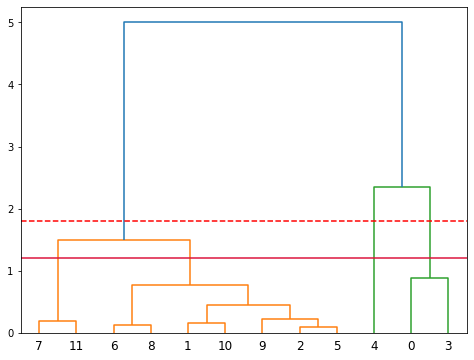

In [87]:
df2 = df[['PROSTITUTION', 'ROBBERY']]
clusters = hierarchy.linkage(df2, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(1.8, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(1.2, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
# plt.axhline(0.2, color='blue');

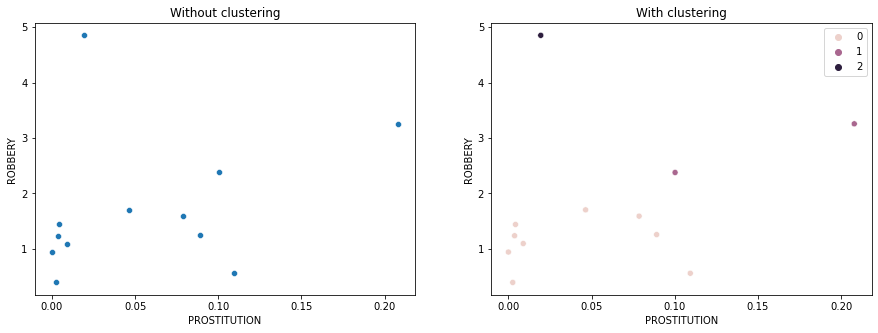

In [88]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df2)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='ROBBERY').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='ROBBERY', 
                hue=clustering_model.labels_).set_title('With clustering');

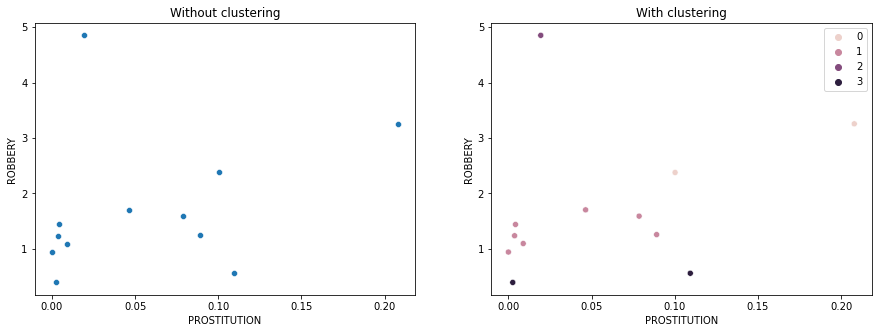

In [89]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df2)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='ROBBERY').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='ROBBERY', 
                hue=clustering_model.labels_).set_title('With clustering');

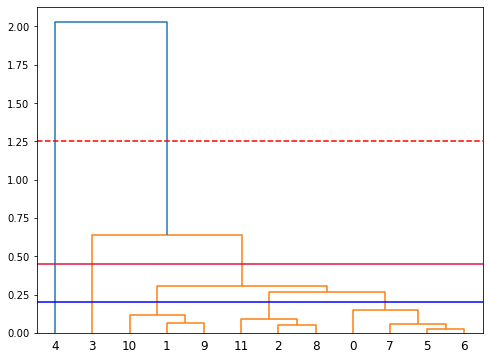

In [93]:
df3 = df[['PROSTITUTION', 'SEARCH WARRANTS']]
clusters = hierarchy.linkage(df3, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(1.25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(0.45, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(0.2, color='blue');

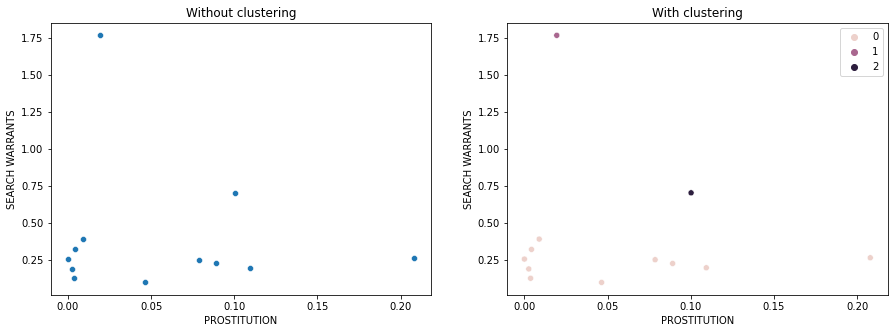

In [97]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df3)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='SEARCH WARRANTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='SEARCH WARRANTS', 
                hue=clustering_model.labels_).set_title('With clustering');

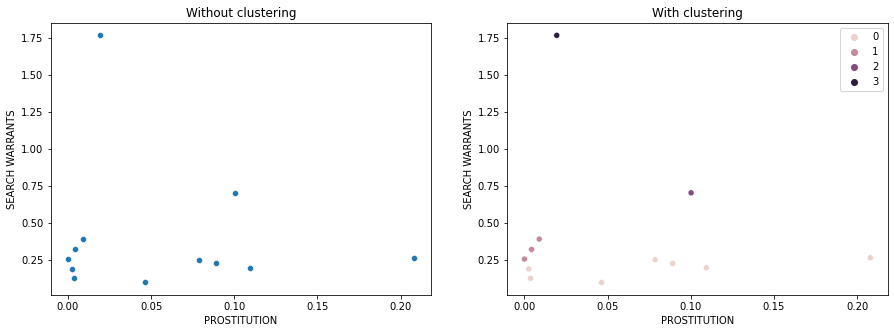

In [98]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df3)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='SEARCH WARRANTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='SEARCH WARRANTS', 
                hue=clustering_model.labels_).set_title('With clustering');

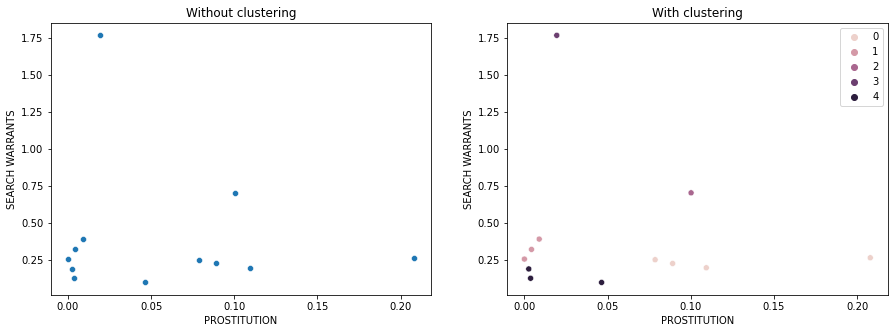

In [99]:
clustering_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
clustering_model.fit(df3)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='SEARCH WARRANTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='SEARCH WARRANTS', 
                hue=clustering_model.labels_).set_title('With clustering');

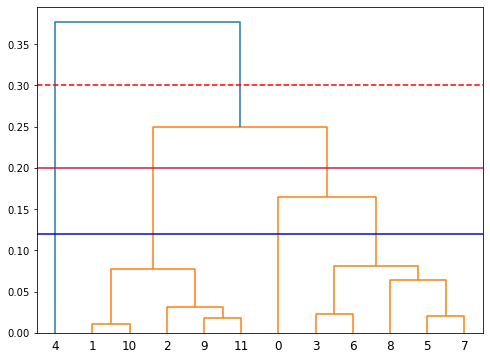

In [101]:
df4 = df[['PROSTITUTION', 'SERVICE']]
clusters = hierarchy.linkage(df4, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(0.3, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(0.2, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(0.12, color='blue');

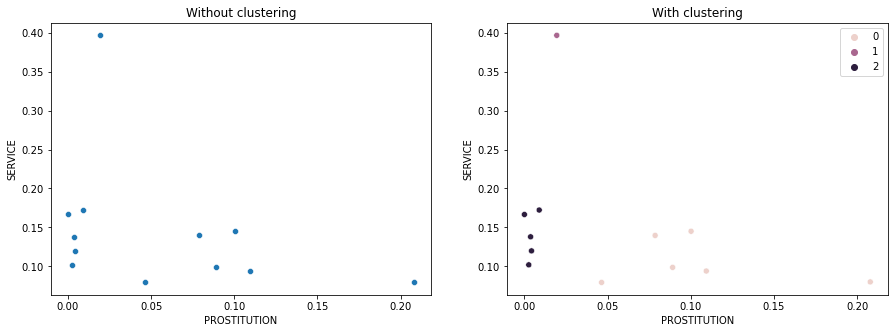

In [102]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df4)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='SERVICE').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='SERVICE', 
                hue=clustering_model.labels_).set_title('With clustering');

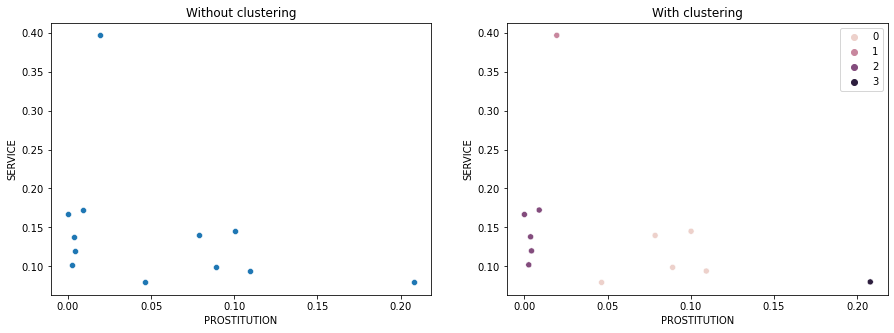

In [103]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df4)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='SERVICE').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='SERVICE', 
                hue=clustering_model.labels_).set_title('With clustering');

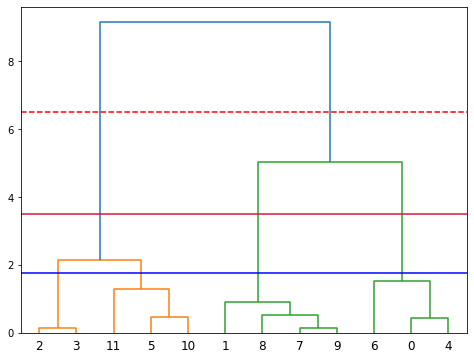

In [109]:
df5 = df[['PROSTITUTION', 'TOWED']]
clusters = hierarchy.linkage(df5, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(6.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.75, color='blue');

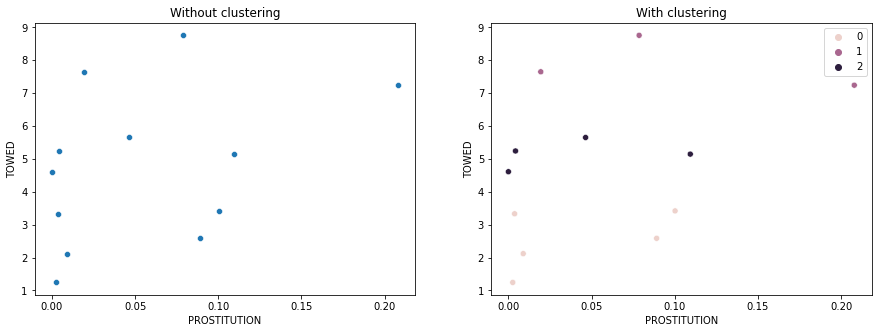

In [110]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df5)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

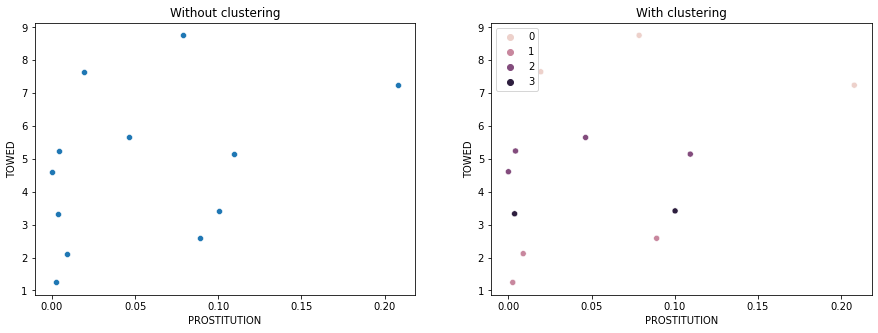

In [111]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df5)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

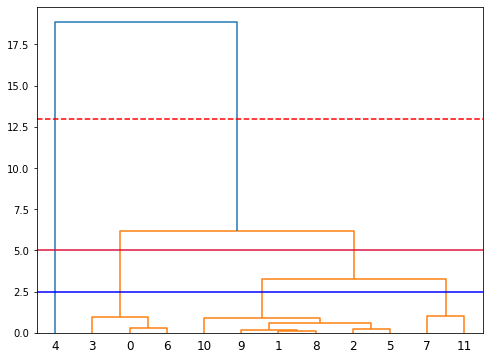

In [113]:
df6 = df[['PROSTITUTION', 'VANDALISM']]
clusters = hierarchy.linkage(df6, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');

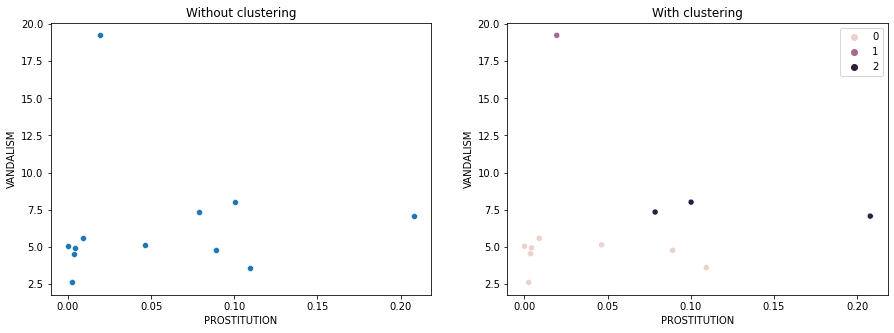

In [124]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df6)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

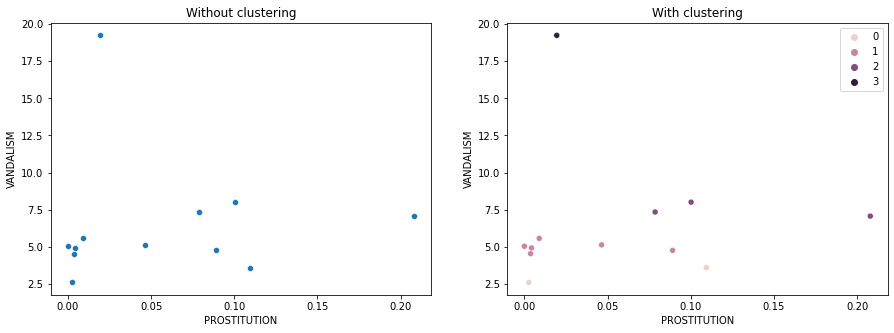

In [125]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df6)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

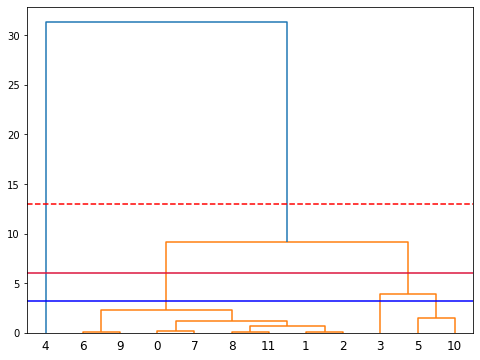

In [118]:
df7 = df[['PROSTITUTION', 'VERBAL DISPUTES']]
clusters = hierarchy.linkage(df7, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(6, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(3.25, color='blue');

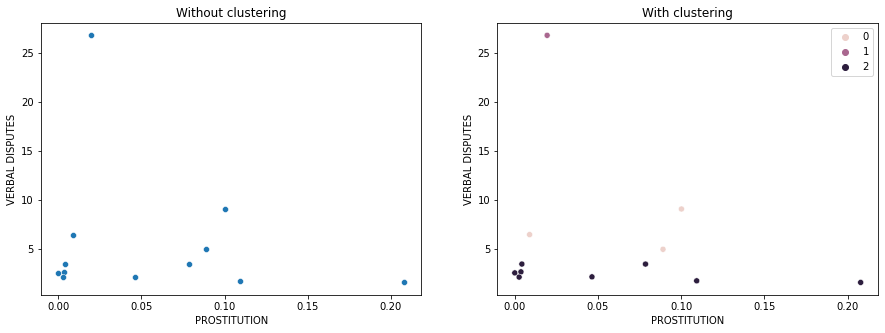

In [121]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df7)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

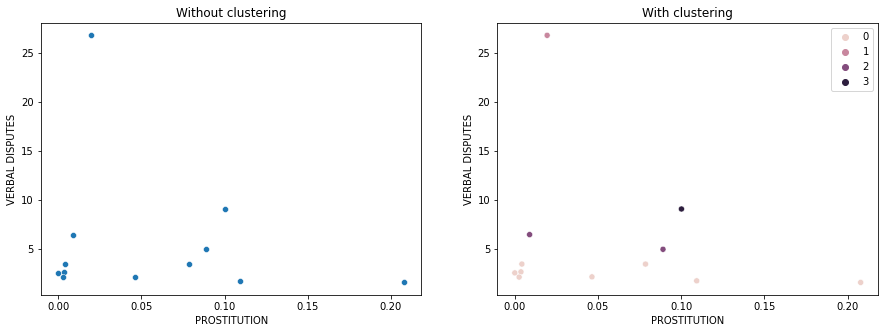

In [131]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df7)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

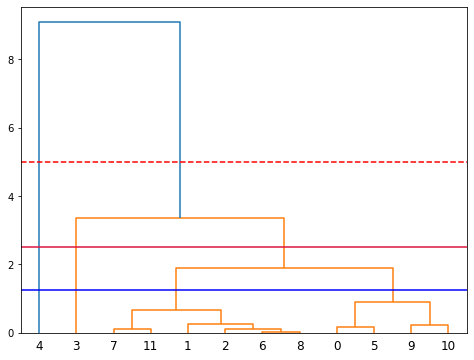

In [127]:
df8 = df[['PROSTITUTION', 'VIOLATIONS']]
clusters = hierarchy.linkage(df8, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.25, color='blue');

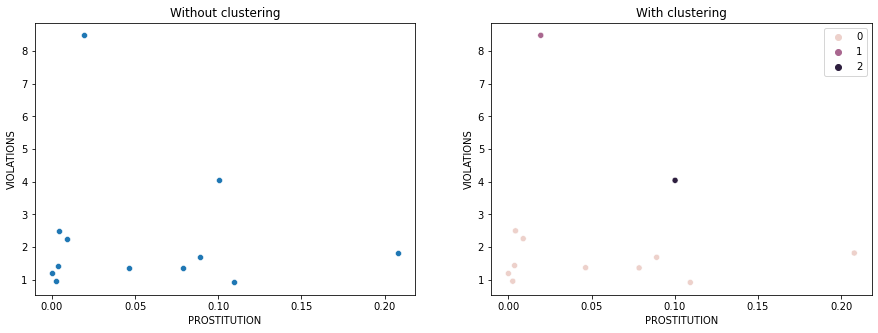

In [129]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df8)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

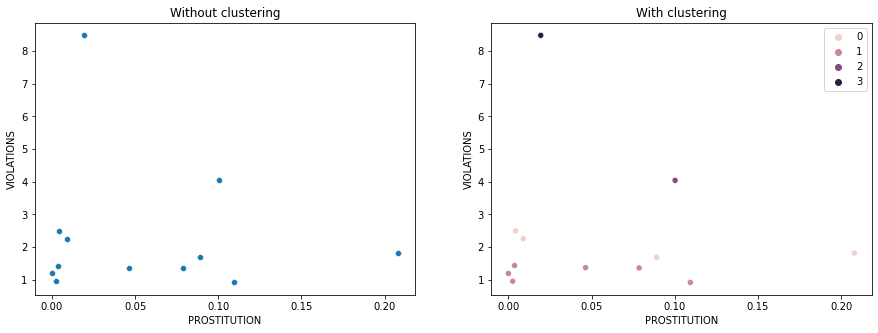

In [130]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df8)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

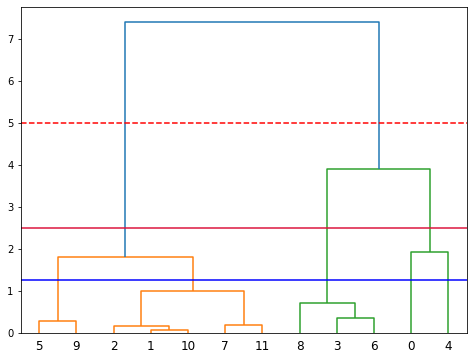

In [132]:
df9 = df[['PROSTITUTION', 'WARRANT ARRESTS']]
clusters = hierarchy.linkage(df9, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.25, color='blue');

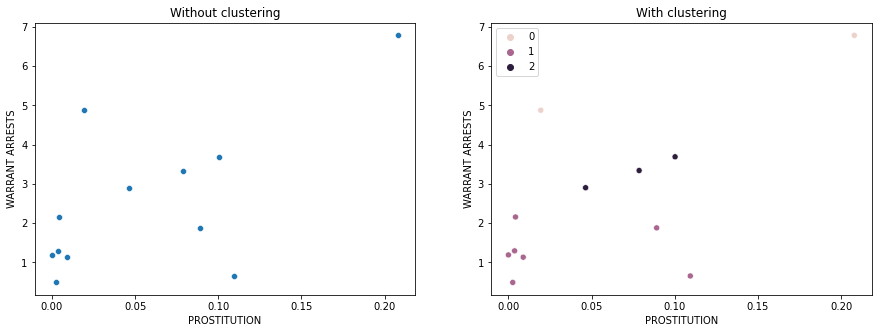

In [133]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df9)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

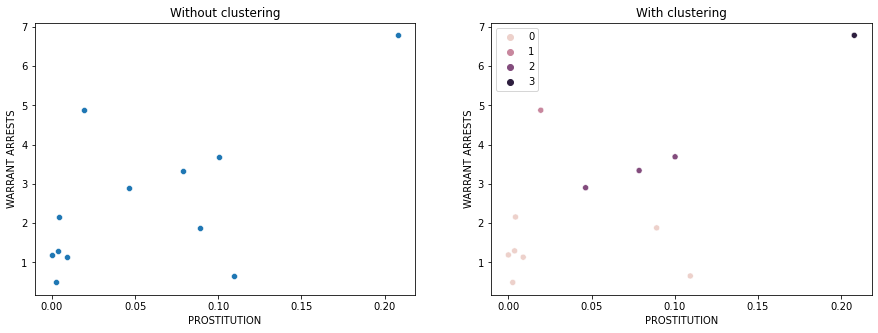

In [134]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df9)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

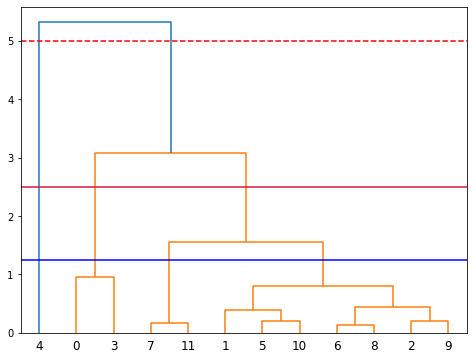

In [135]:
df10 = df[['RESTRAINING ORDER VIOLATIONS', 'ROBBERY']]
clusters = hierarchy.linkage(df10, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.25, color='blue');

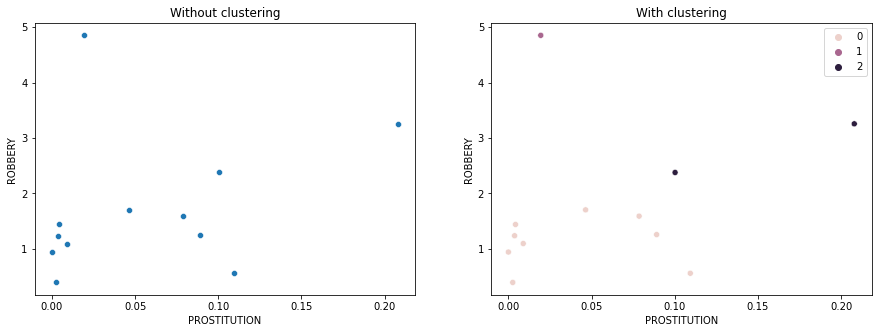

In [139]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df10)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='ROBBERY').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='ROBBERY', 
                hue=clustering_model.labels_).set_title('With clustering');

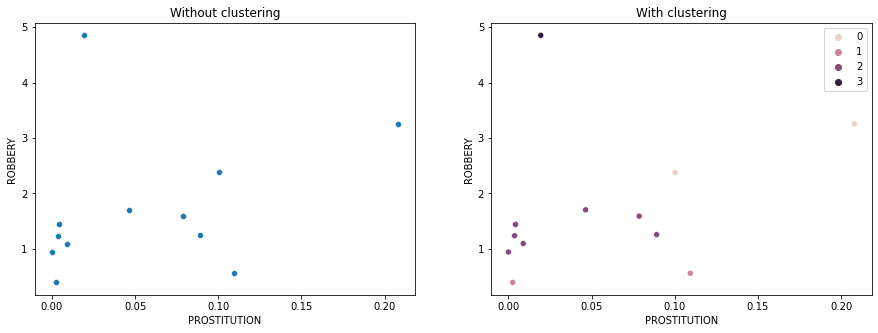

In [140]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df10)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='PROSTITUTION', y='ROBBERY').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='PROSTITUTION', y='ROBBERY', 
                hue=clustering_model.labels_).set_title('With clustering');

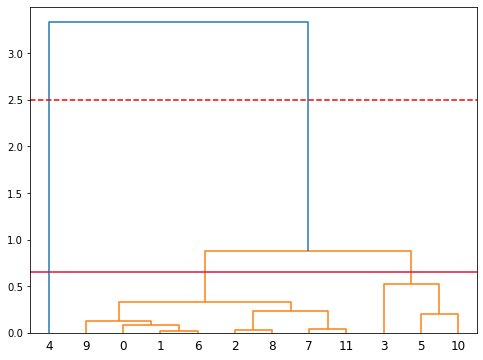

In [144]:
df11 = df[['RESTRAINING ORDER VIOLATIONS', 'SEARCH WARRANTS']]
clusters = hierarchy.linkage(df11, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(2.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(0.65, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
# plt.axhline(0.7, color='blue');

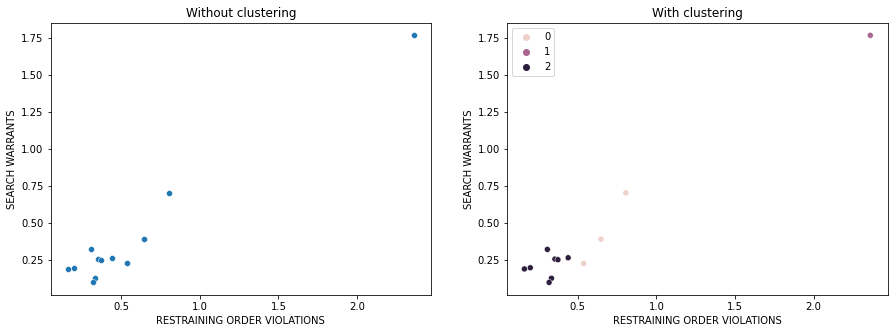

In [145]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df11)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='SEARCH WARRANTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='SEARCH WARRANTS', 
                hue=clustering_model.labels_).set_title('With clustering');

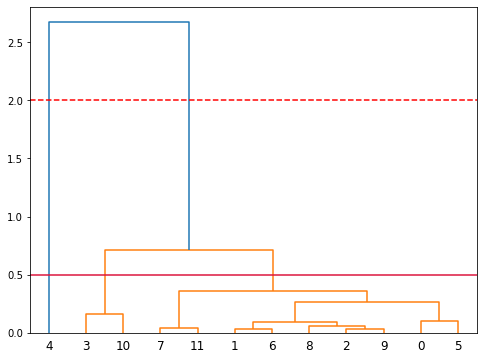

In [148]:
df12 = df[['RESTRAINING ORDER VIOLATIONS', 'SERVICE']]
clusters = hierarchy.linkage(df12, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(2, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(0.5, color='crimson');
# Plotting a horizontal line based on the second biggest distance between clusters 
# plt.axhline(1.25, color='blue');

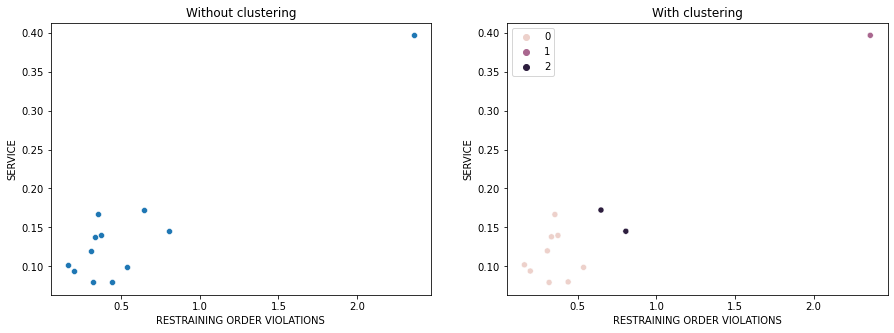

In [149]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df12)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='SERVICE').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='SERVICE', 
                hue=clustering_model.labels_).set_title('With clustering');

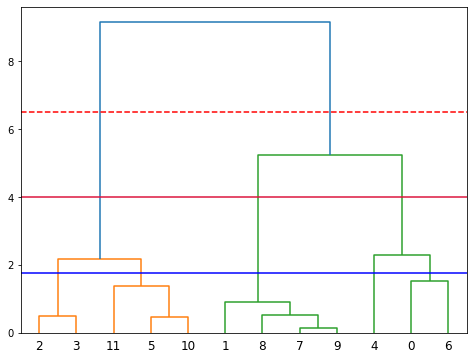

In [151]:
df13 = df[['RESTRAINING ORDER VIOLATIONS', 'TOWED']]
clusters = hierarchy.linkage(df13, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(6.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(4, color='crimson');
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(1.75, color='blue');

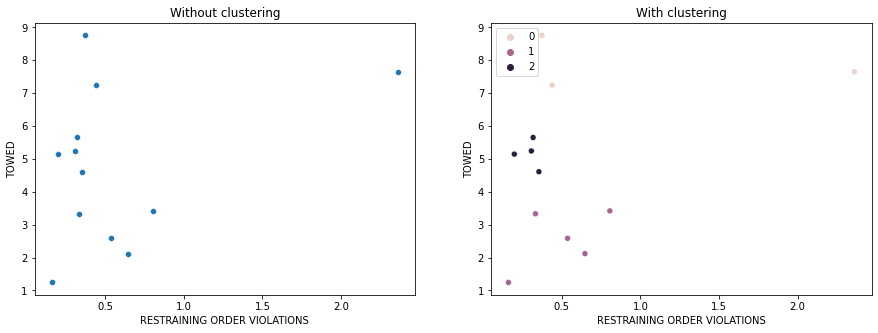

In [152]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df13)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

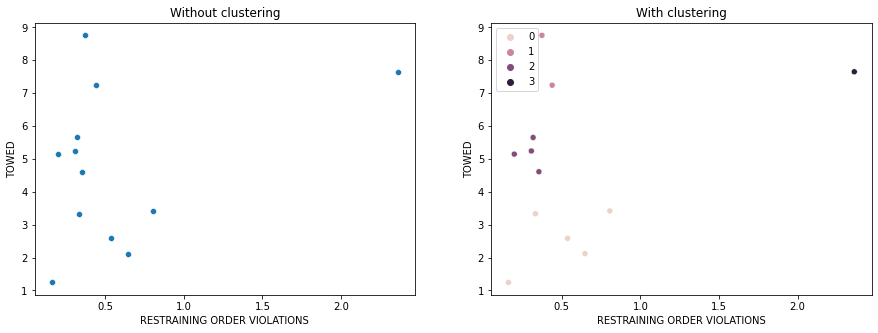

In [153]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df13)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

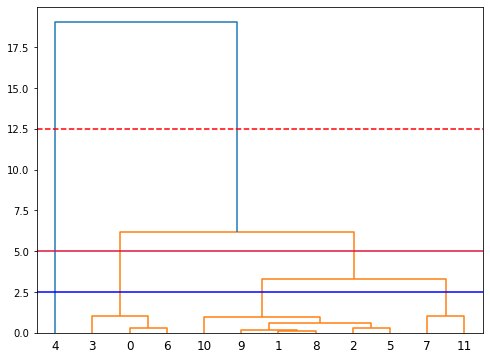

In [156]:
df14 = df[['RESTRAINING ORDER VIOLATIONS', 'VANDALISM']]
clusters = hierarchy.linkage(df14, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(12.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');

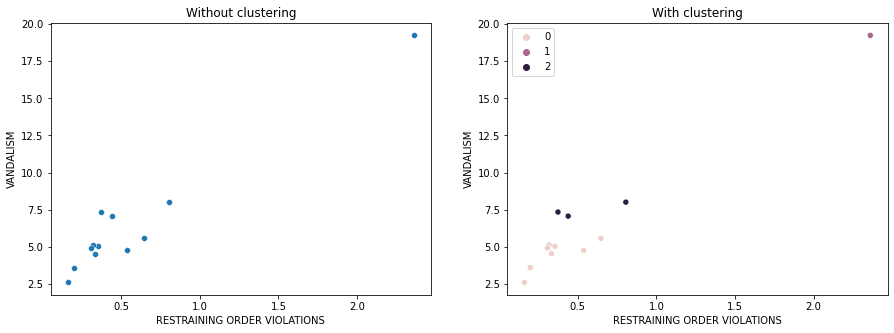

In [157]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df14)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

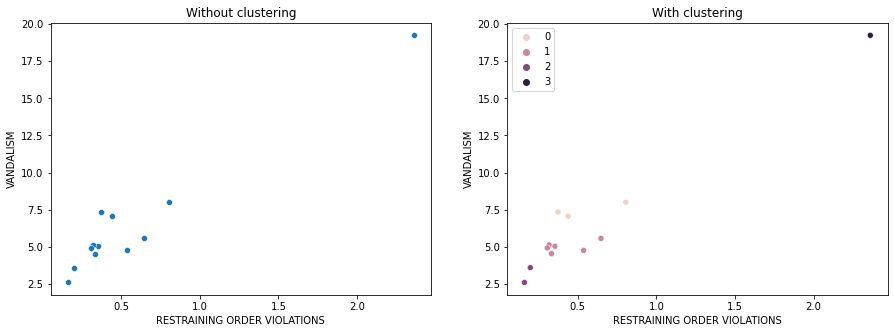

In [158]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df8)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

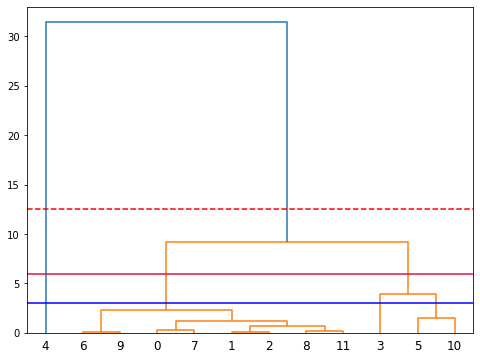

In [161]:
df15 = df[['RESTRAINING ORDER VIOLATIONS', 'VERBAL DISPUTES']]
clusters = hierarchy.linkage(df15, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(12.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(6, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(3, color='blue');

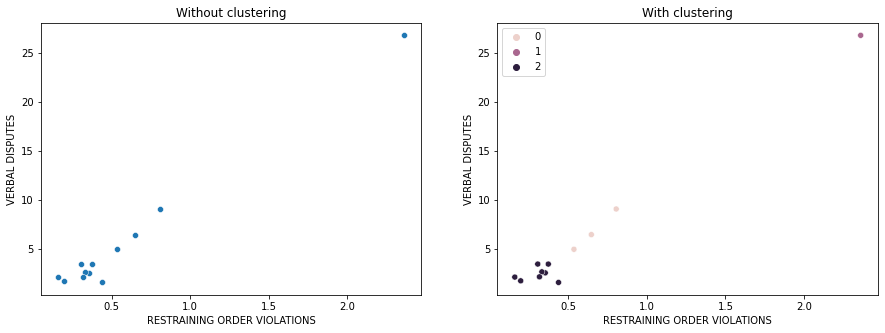

In [166]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df15)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

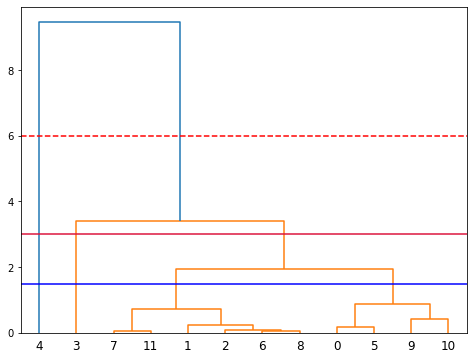

In [168]:
df16 = df[['RESTRAINING ORDER VIOLATIONS', 'VIOLATIONS']]
clusters = hierarchy.linkage(df16, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(6, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.5, color='blue');

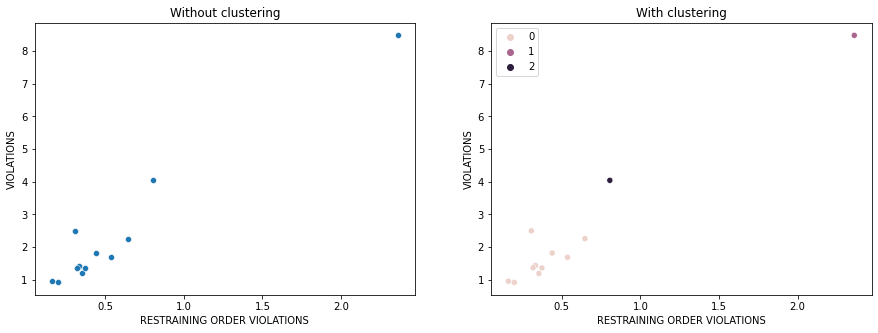

In [169]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df16)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

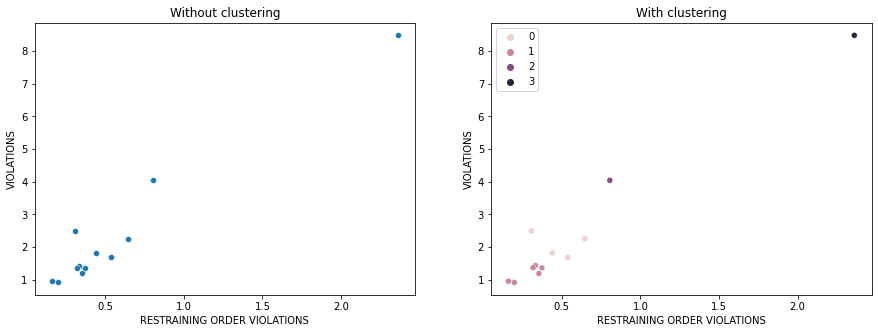

In [170]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df16)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

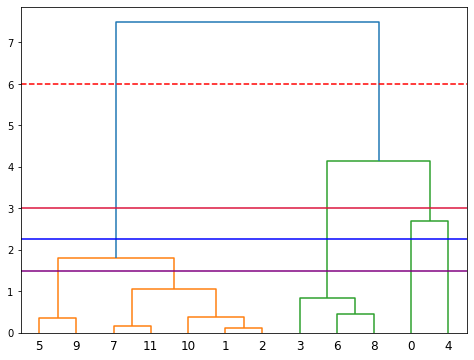

In [175]:
df17 = df[['RESTRAINING ORDER VIOLATIONS', 'WARRANT ARRESTS']]
clusters = hierarchy.linkage(df17, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(6, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.25, color='blue');
# Plotting a horizontal line based on the fourth biggest distance between clusters 
plt.axhline(1.5, color='purple');

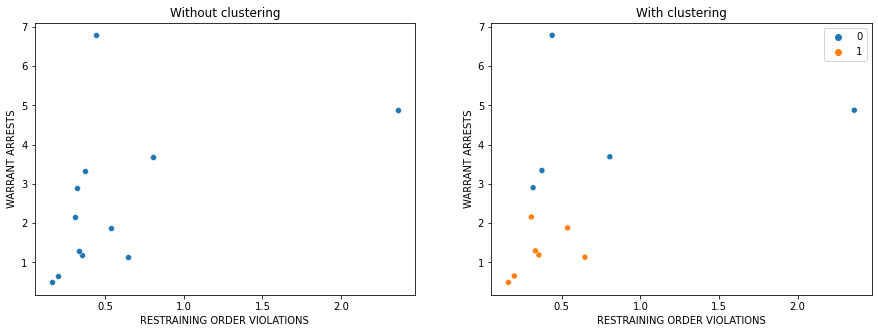

In [179]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage="ward")
clustering_model.fit(df17)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

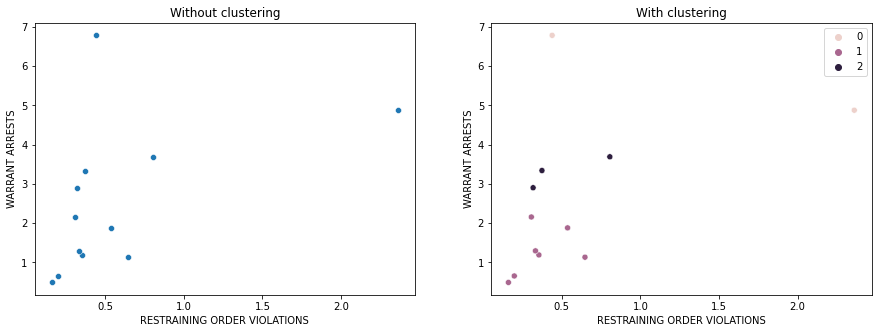

In [180]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df17)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

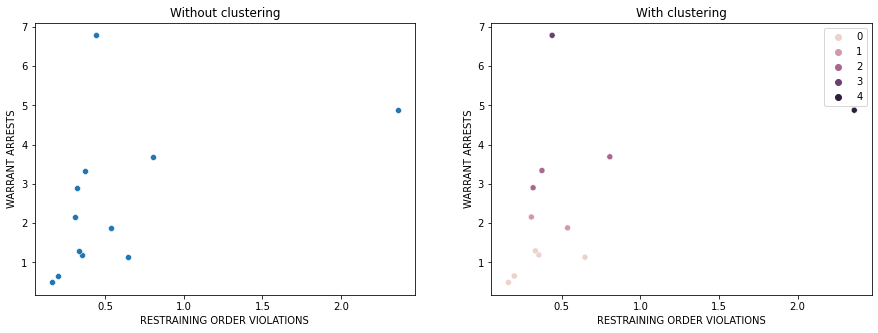

In [181]:
clustering_model = AgglomerativeClustering(n_clusters=5, linkage="ward")
clustering_model.fit(df17)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='RESTRAINING ORDER VIOLATIONS', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='RESTRAINING ORDER VIOLATIONS', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

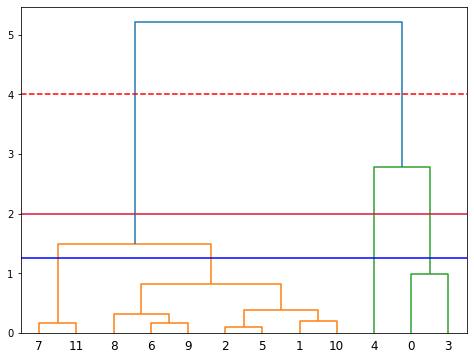

In [183]:
df18 = df[['ROBBERY', 'SEARCH WARRANTS']]
clusters = hierarchy.linkage(df18, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(4, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.25, color='blue');

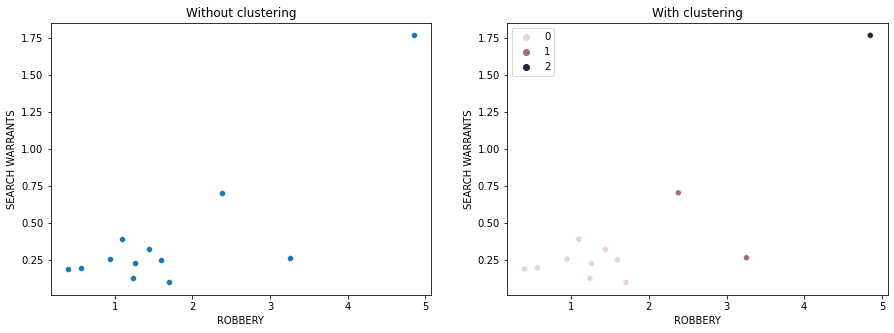

In [187]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df18)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='SEARCH WARRANTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='SEARCH WARRANTS', 
                hue=clustering_model.labels_).set_title('With clustering');

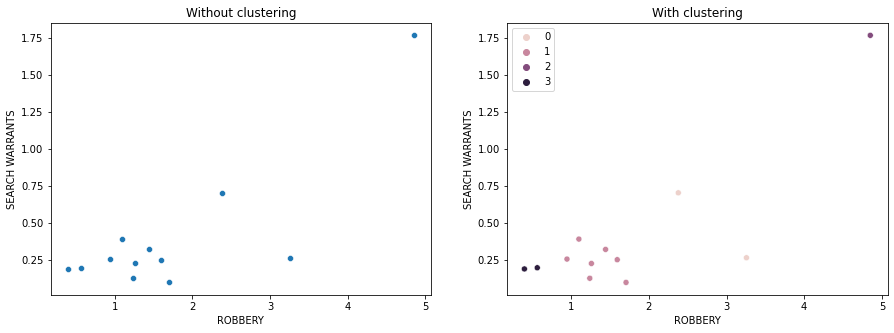

In [186]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df18)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='SEARCH WARRANTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='SEARCH WARRANTS', 
                hue=clustering_model.labels_).set_title('With clustering');

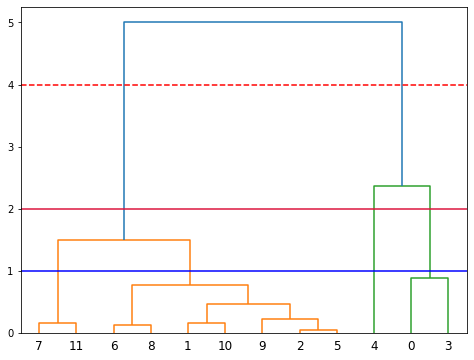

In [189]:
df19 = df[['ROBBERY', 'SERVICE']]
clusters = hierarchy.linkage(df19, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(4, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1, color='blue');

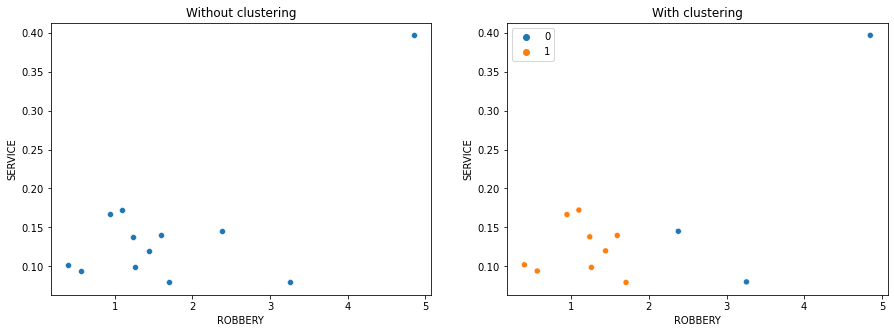

In [195]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage="ward")
clustering_model.fit(df19)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='SERVICE').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='SERVICE', 
                hue=clustering_model.labels_).set_title('With clustering');

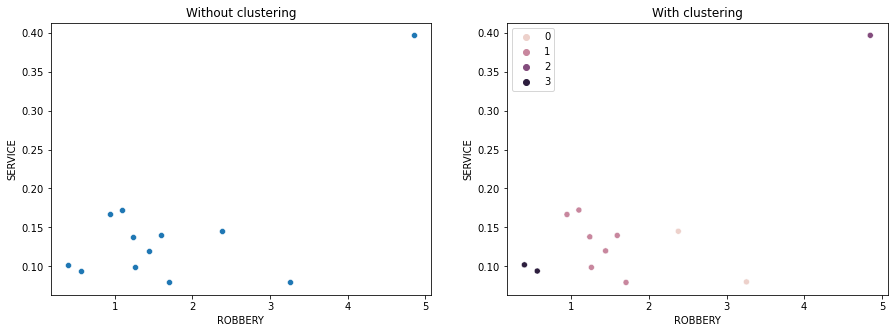

In [196]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df19)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='SERVICE').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='SERVICE', 
                hue=clustering_model.labels_).set_title('With clustering');

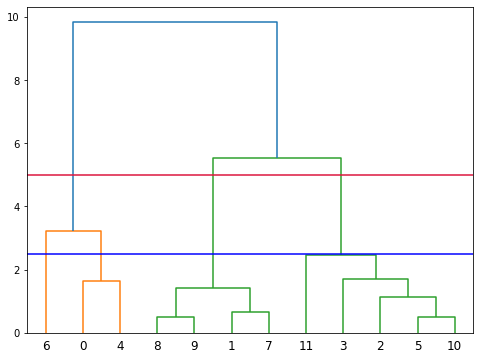

In [197]:
df20 = df[['ROBBERY', 'TOWED']]
clusters = hierarchy.linkage(df20, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(7, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');

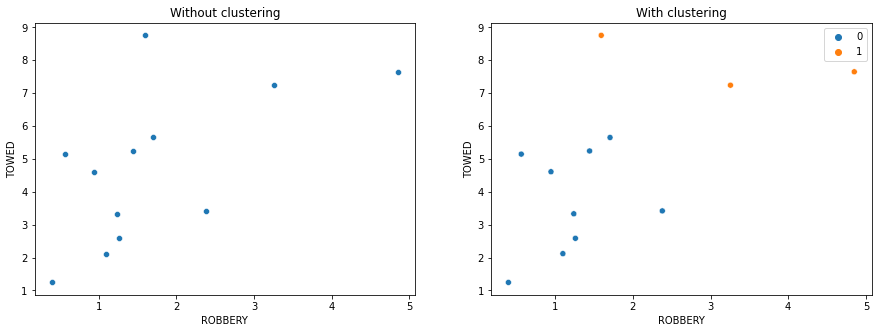

In [199]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage="ward")
clustering_model.fit(df20)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

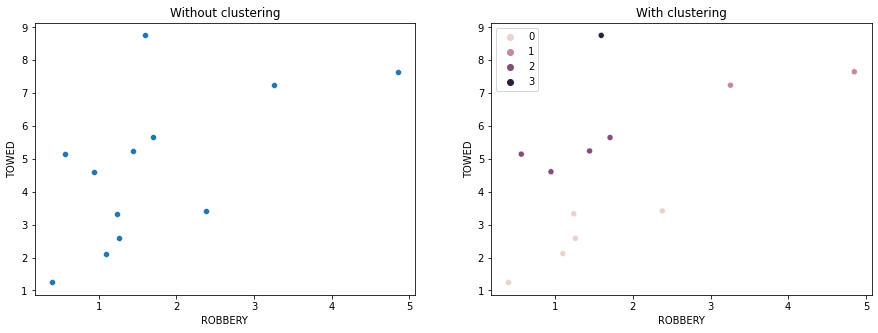

In [201]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df20)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

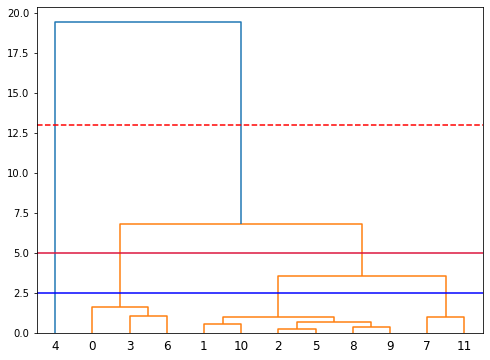

In [202]:
df21 = df[['ROBBERY', 'VANDALISM']]
clusters = hierarchy.linkage(df21, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');

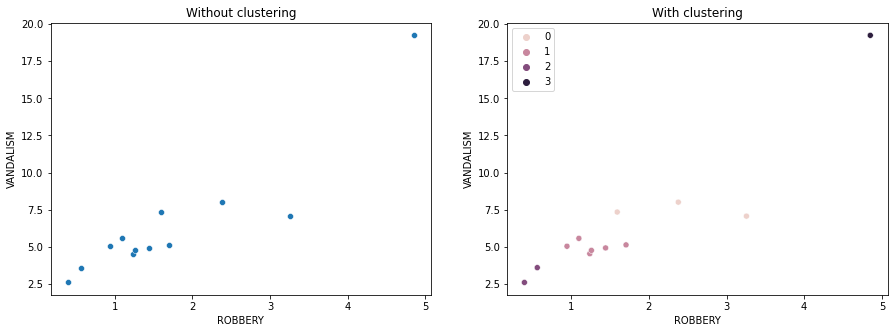

In [204]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df21)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

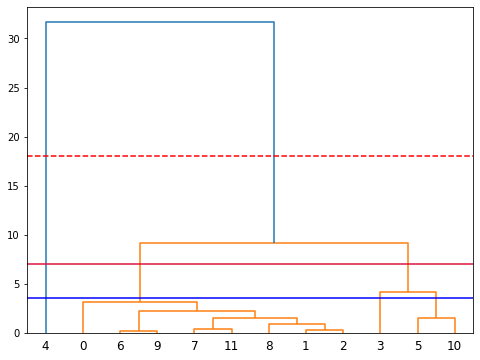

In [209]:
df22 = df[['ROBBERY', 'VERBAL DISPUTES']]
clusters = hierarchy.linkage(df22, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(18, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(7, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(3.5, color='blue');

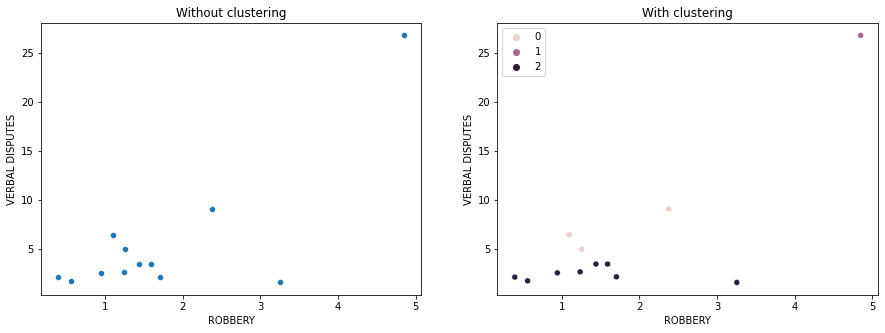

In [211]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df22)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

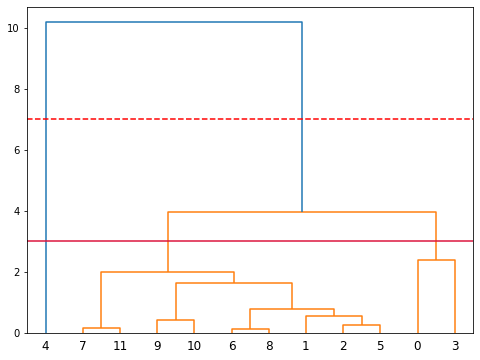

In [213]:
df23 = df[['ROBBERY', 'VIOLATIONS']]
clusters = hierarchy.linkage(df23, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(7, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
# plt.axhline(2.5, color='blue');

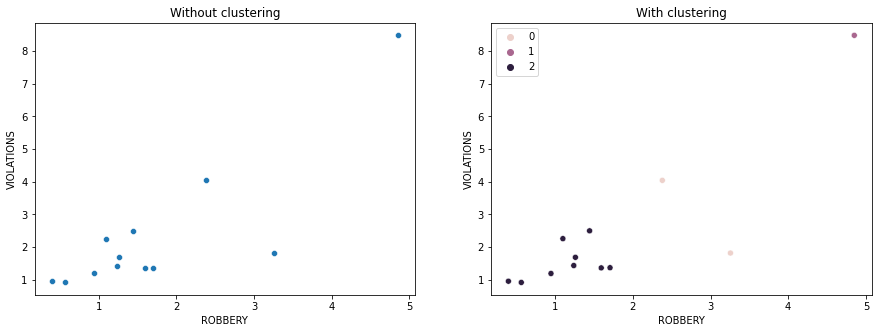

In [214]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df23)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='ROBBERY', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='ROBBERY', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

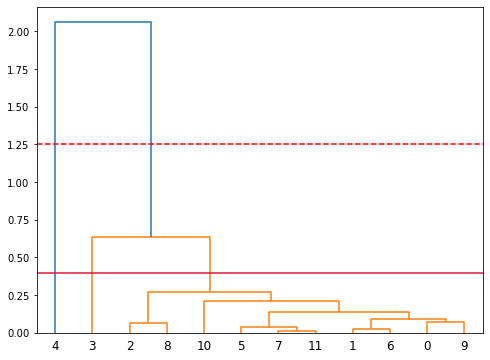

In [216]:
df24 = df[['SEARCH WARRANTS', 'SERVICE']]
clusters = hierarchy.linkage(df24, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(1.25, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(0.4, color='crimson');
# Plotting a horizontal line based on the second biggest distance between clusters 
# plt.axhline(2.5, color='blue');

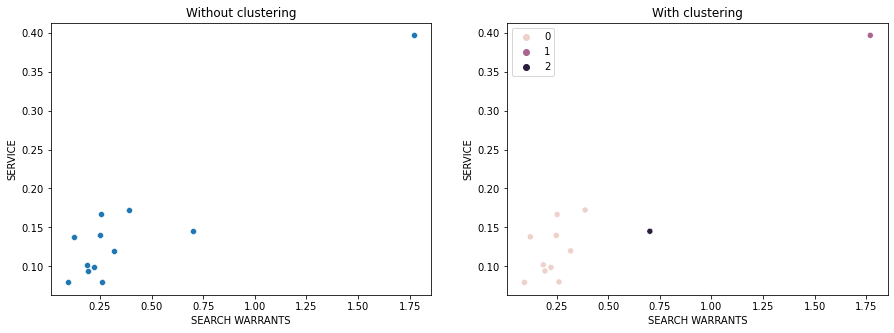

In [217]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df24)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SEARCH WARRANTS', y='SERVICE').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SEARCH WARRANTS', y='SERVICE', 
                hue=clustering_model.labels_).set_title('With clustering');

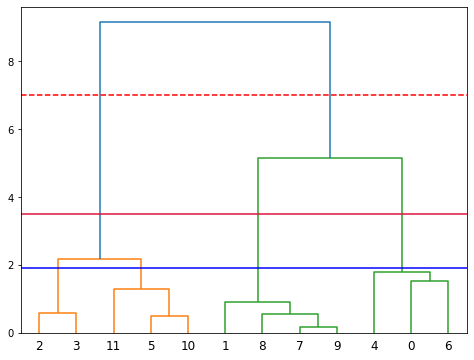

In [221]:
df25 = df[['SEARCH WARRANTS', 'TOWED']]
clusters = hierarchy.linkage(df25, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(7, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.9, color='blue');

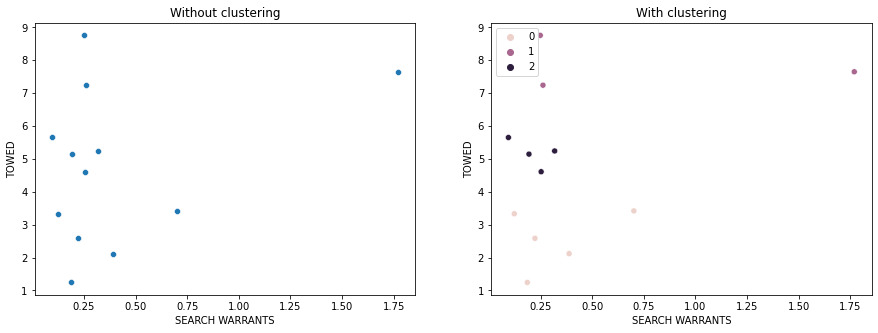

In [224]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df25)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SEARCH WARRANTS', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SEARCH WARRANTS', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

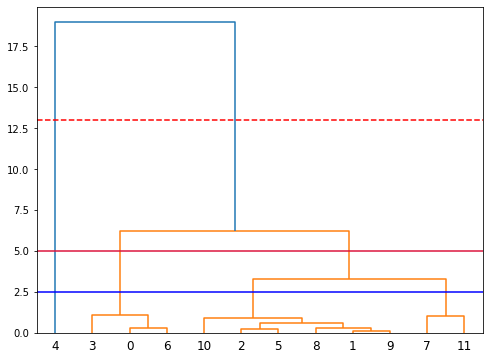

In [225]:
df26 = df[['SEARCH WARRANTS', 'VANDALISM']]
clusters = hierarchy.linkage(df26, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');

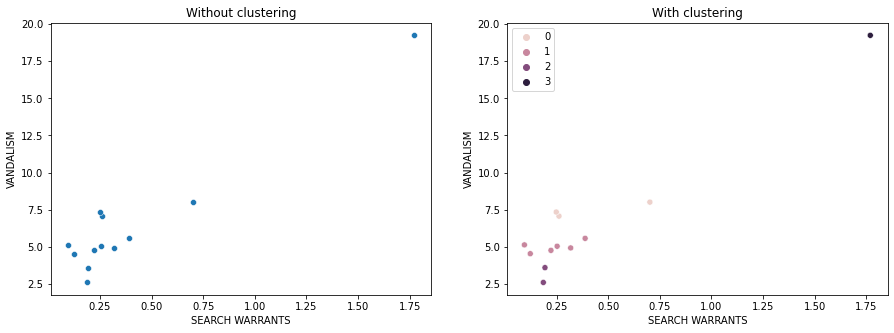

In [229]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df26)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SEARCH WARRANTS', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SEARCH WARRANTS', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

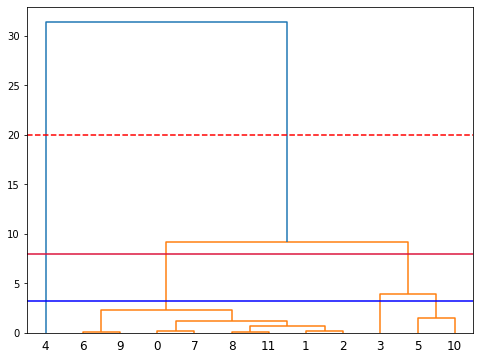

In [236]:
df27 = df[['SEARCH WARRANTS', 'VERBAL DISPUTES']]
clusters = hierarchy.linkage(df27, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(20, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(8, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(3.25, color='blue');

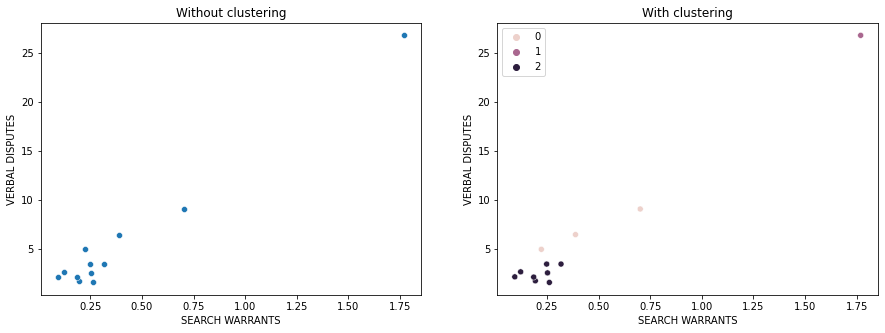

In [240]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df27)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SEARCH WARRANTS', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SEARCH WARRANTS', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

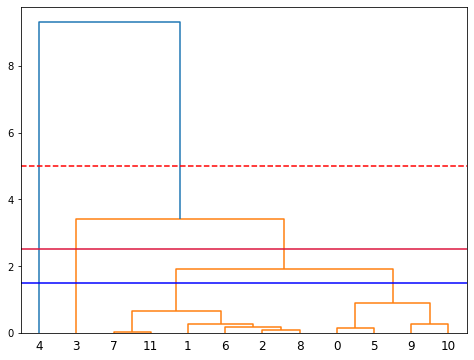

In [242]:
df28 = df[['SEARCH WARRANTS', 'VIOLATIONS']]
clusters = hierarchy.linkage(df28, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.5, color='blue');

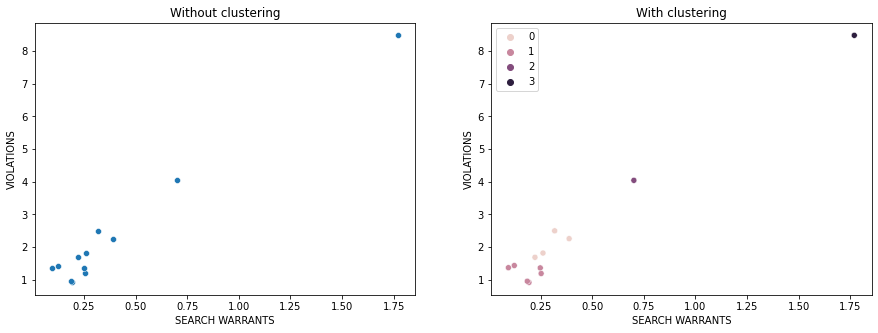

In [245]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df28)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SEARCH WARRANTS', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SEARCH WARRANTS', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

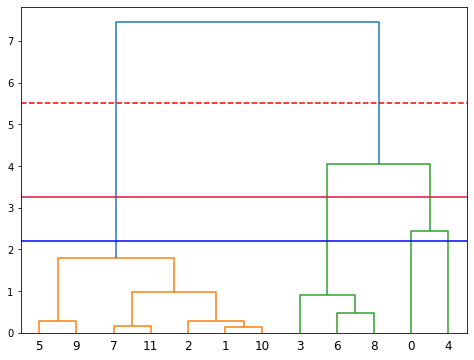

In [251]:
df29 = df[['SEARCH WARRANTS', 'WARRANT ARRESTS']]
clusters = hierarchy.linkage(df29, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(5.5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3.25, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.2, color='blue');

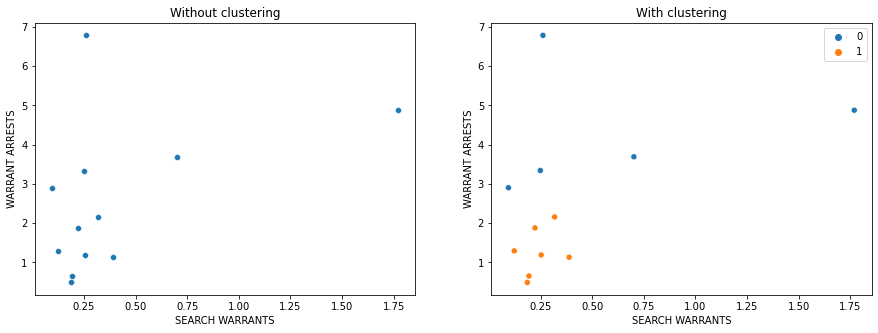

In [256]:
clustering_model = AgglomerativeClustering(n_clusters=2, linkage="ward")
clustering_model.fit(df29)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SEARCH WARRANTS', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SEARCH WARRANTS', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

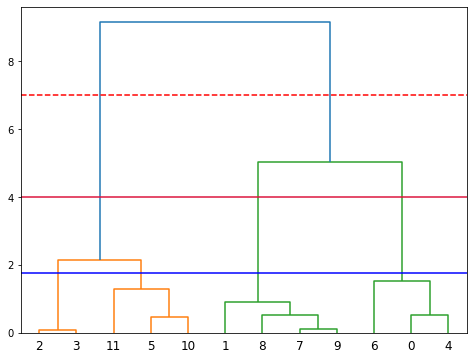

In [259]:
df30 = df[['SERVICE', 'TOWED']]
clusters = hierarchy.linkage(df30, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(7, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(4, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.75, color='blue');

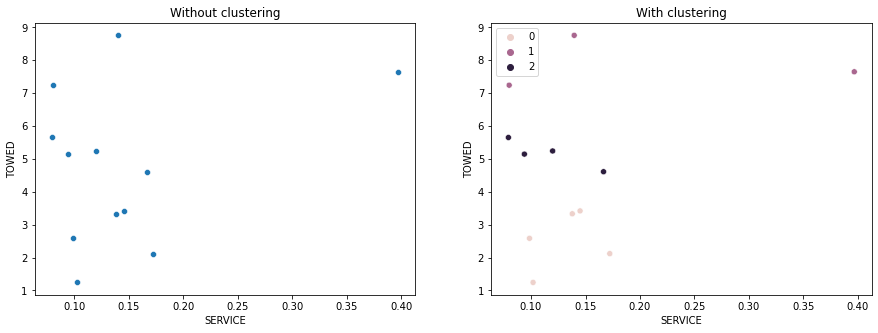

In [260]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df30)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SERVICE', y='TOWED').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SERVICE', y='TOWED', 
                hue=clustering_model.labels_).set_title('With clustering');

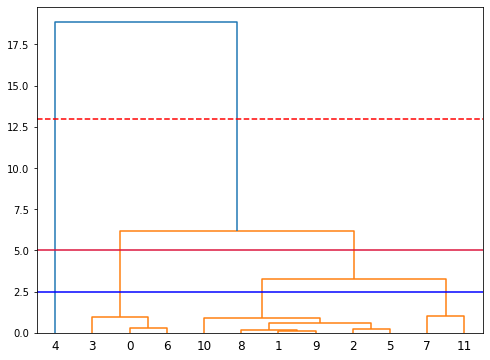

In [261]:
df31 = df[['SERVICE', 'VANDALISM']]
clusters = hierarchy.linkage(df31, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');

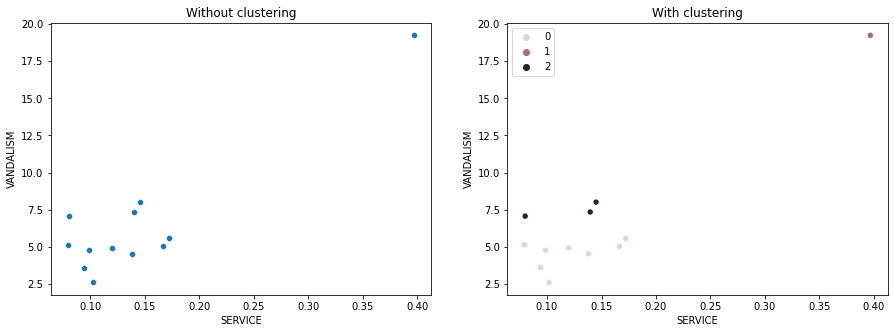

In [266]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df31)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SERVICE', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SERVICE', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

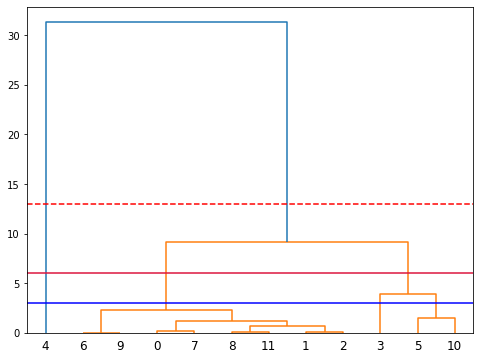

In [269]:
df32 = df[['SERVICE', 'VERBAL DISPUTES']]
clusters = hierarchy.linkage(df32, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(6, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(3, color='blue');

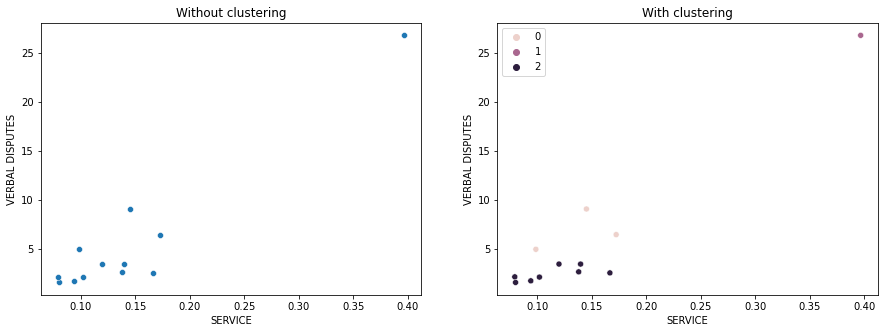

In [270]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df32)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SERVICE', y='VERBAL DISPUTES').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SERVICE', y='VERBAL DISPUTES', 
                hue=clustering_model.labels_).set_title('With clustering');

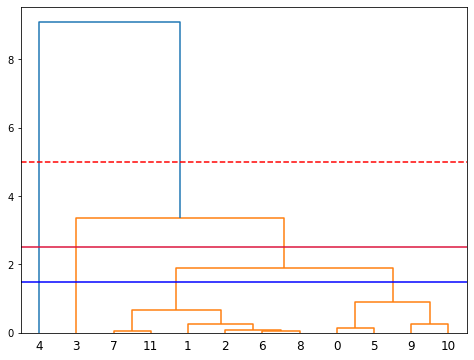

In [272]:
df33 = df[['SERVICE', 'VIOLATIONS']]
clusters = hierarchy.linkage(df33, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(5, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(2.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(1.5, color='blue');

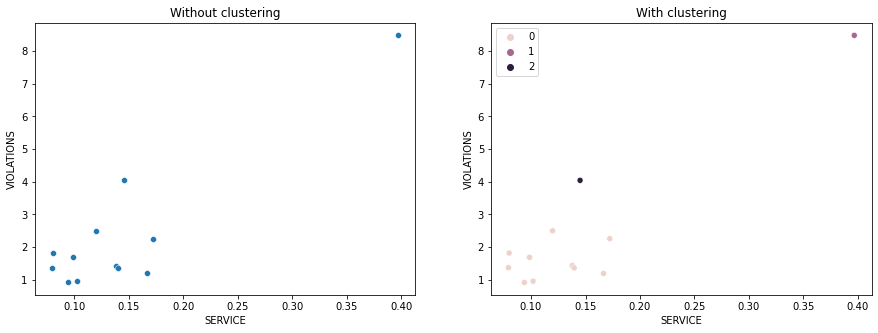

In [275]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df33)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SERVICE', y='VIOLATIONS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SERVICE', y='VIOLATIONS', 
                hue=clustering_model.labels_).set_title('With clustering');

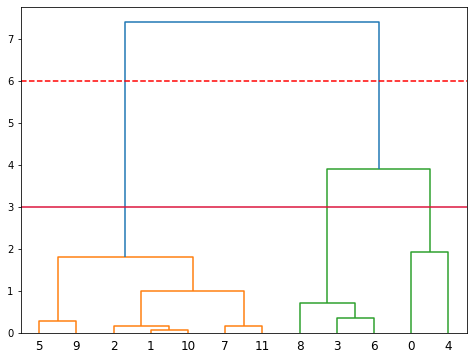

In [281]:
df34 = df[['SERVICE', 'WARRANT ARRESTS']]
clusters = hierarchy.linkage(df34, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(6, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(3, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
# plt.axhline(1.95, color='blue');

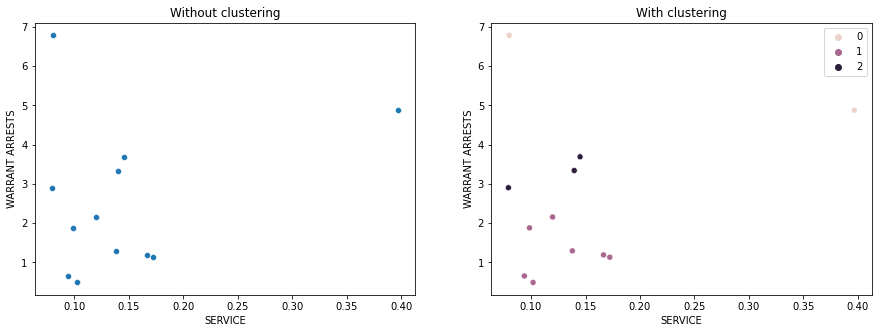

In [282]:
clustering_model = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering_model.fit(df34)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='SERVICE', y='WARRANT ARRESTS').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='SERVICE', y='WARRANT ARRESTS', 
                hue=clustering_model.labels_).set_title('With clustering');

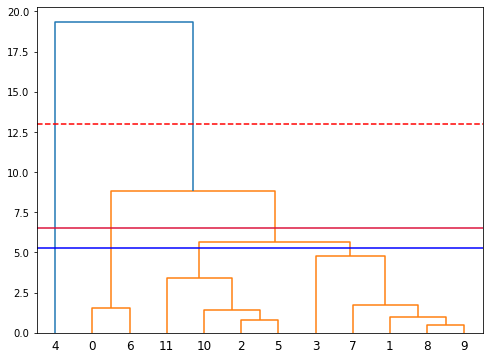

In [284]:
df35 = df[['TOWED', 'VANDALISM']]
clusters = hierarchy.linkage(df35, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(6.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(5.25, color='blue');

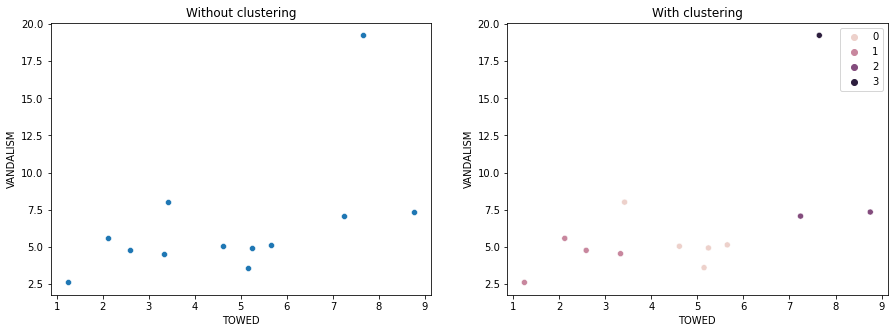

In [286]:
clustering_model = AgglomerativeClustering(n_clusters=4, linkage="ward")
clustering_model.fit(df35)
labels = clustering_model.labels_

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='TOWED', y='VANDALISM').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='TOWED', y='VANDALISM', 
                hue=clustering_model.labels_).set_title('With clustering');

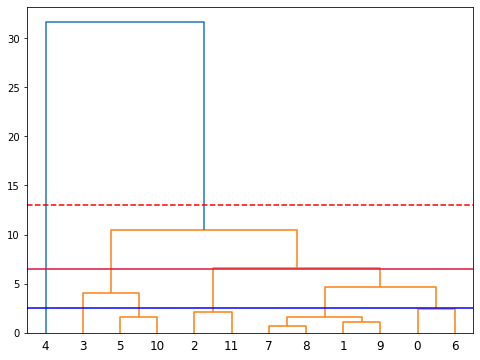

In [6]:
df36 = df[['TOWED', 'VERBAL DISPUTES']]
clusters = hierarchy.linkage(df36, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(13, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(6.5, color='crimson');
# Plotting a horizontal line based on the third biggest distance between clusters 
plt.axhline(2.5, color='blue');